In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import yaml
import pickle
from pickle import HIGHEST_PROTOCOL

In [2]:
with open ('../params.yml') as file:
    config = yaml.safe_load(file)

# Index

## Linear Regression
- [Data Preparation 1.1](#data-preparation-1-1)
- [ 2.2](#-1-2)

## Decision Tree
- [ 2.1](#-2-1)
- [ 2.2](#-2-2)

## Random Forest
- [ 3.1](#-3-1)
- [ 3.2](#-3-2)

## Data Preparation

In [3]:
data = pd.read_csv('../data/clean/data_clean.csv')
data_sampled = data.sample(frac=0.1, random_state=42)
data_sampled.head()
print(type(data_sampled))

/var/folders/6m/xnrf68g93dj9cnj3lwnc18b00000gn/T/ipykernel_32046/3952697185.py:1: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/clean/data_clean.csv')


<class 'pandas.core.frame.DataFrame'>


In [4]:
print(data_sampled.shape)
data_sampled.info()

(1116575, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 1116575 entries, 5960783 to 6525690
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   departure            1116575 non-null  object 
 1   return               1116575 non-null  object 
 2   departure_id         1116575 non-null  object 
 3   departure_name       1116575 non-null  object 
 4   return_id            1116575 non-null  object 
 5   return_name          1116575 non-null  object 
 6   distancem            1116575 non-null  float64
 7   durationsec.         1116575 non-null  float64
 8   departure_latitude   1116575 non-null  float64
 9   departure_longitude  1116575 non-null  float64
 10  return_latitude      1116575 non-null  float64
 11  return_longitude     1116575 non-null  float64
 12  airtemperaturedegc   1116575 non-null  float64
 13  distancekm           1116575 non-null  float64
 14  durationmin          1116575 non-nu

In [5]:
numerical = data_sampled.select_dtypes(np.number)
categorical = data_sampled.select_dtypes(object)

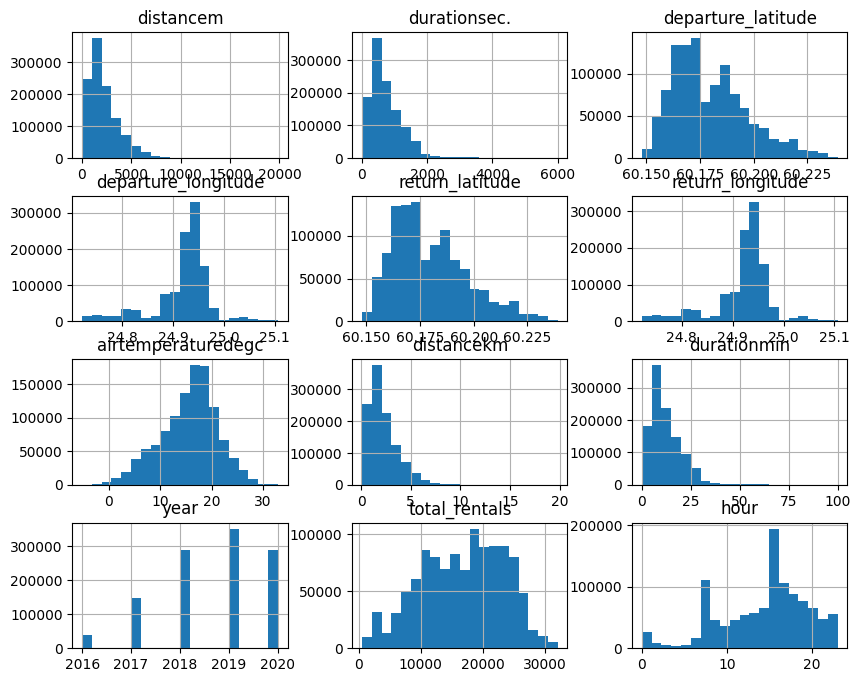

In [6]:
numerical.hist(bins=20, figsize=(10,8))
plt.show()

In [7]:
# Using logarithmic function to normalize the distribution of the skewed columns
# (This is supposed to improve the performance of the Linear Regression Model)

data_sampled['distancekm_transformed'] = np.log(data_sampled['distancekm'])
data_sampled['durationmin_transformed'] = np.log(data_sampled['durationmin'])

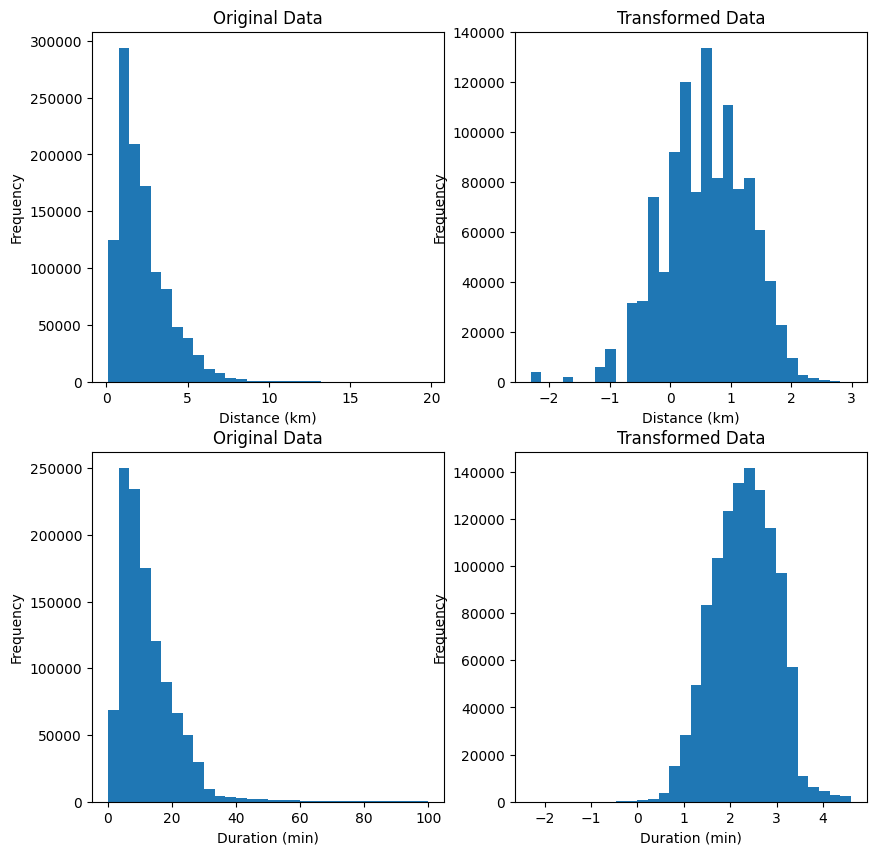

In [8]:
# plotting both to see changes

fig, axs= plt.subplots(2, 2, figsize=(10,10))
axs[0,0].hist(data_sampled['distancekm'],bins=30)
axs[0, 0].set_xlabel('Distance (km)')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Original Data')
axs[0,1].hist(data_sampled['distancekm_transformed'],bins=30)
axs[0, 1].set_xlabel('Distance (km)')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Transformed Data')
axs[1,0].hist(data_sampled['durationmin'],bins=30)
axs[1, 0].set_xlabel('Duration (min)')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Original Data')
axs[1,1].hist(data_sampled['durationmin_transformed'],bins=30)
axs[1, 1].set_xlabel('Duration (min)')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Transformed Data')

plt.show()

In [9]:
data_sampled.head()

,departure,return,departure_id,departure_name,return_id,return_name,distancem,durationsec.,departure_latitude,departure_longitude,...,airtemperaturedegc,distancekm,durationmin,month,year,total_rentals,hour,weekday,distancekm_transformed,durationmin_transformed
5960783,2019-09-14 21:17:08,2019-09-14 21:36:37,107,Tenholantie,45.0,Brahen kenttä,4355.0,1165.0,60.202439,24.905461,...,10.7,4.4,19.4,September,2019,11645,21,Saturday,1.481605,2.965273
3487133,2019-05-16 12:33:39,2019-05-16 12:36:37,34,Kansallismuseo,25.0,Narinkka,492.0,174.0,60.173964,24.932987,...,14.7,0.5,2.9,May,2019,24447,12,Thursday,-0.693147,1.064711
3766623,2019-05-29 18:03:11,2019-05-29 18:19:18,39,Ooppera,30.0,Itämerentori,3183.0,962.0,60.182553,24.926687,...,15.1,3.2,16.0,May,2019,22301,18,Wednesday,1.163151,2.772589
6969194,2018-05-23 08:58:35,2018-05-23 10:01:59,37.0,Töölönkatu,41.0,Ympyrätalo,2921.0,3802.0,60.177560,24.928327,...,17.6,2.9,63.4,May,2018,24243,8,Wednesday,1.064711,4.149464
8353630,2018-08-11 00:18:00,2018-08-11 00:26:00,122.0,Lintulahdenkatu,43.0,Karhupuisto,925.0,503.0,60.183718,24.962194,...,21.2,0.9,8.4,August,2018,19248,0,Saturday,-0.105361,2.128232


In [10]:
numerical = data_sampled.select_dtypes(np.number)

In [11]:
# check for correlation and dropping highly correlated columns to avoid multicollinearity

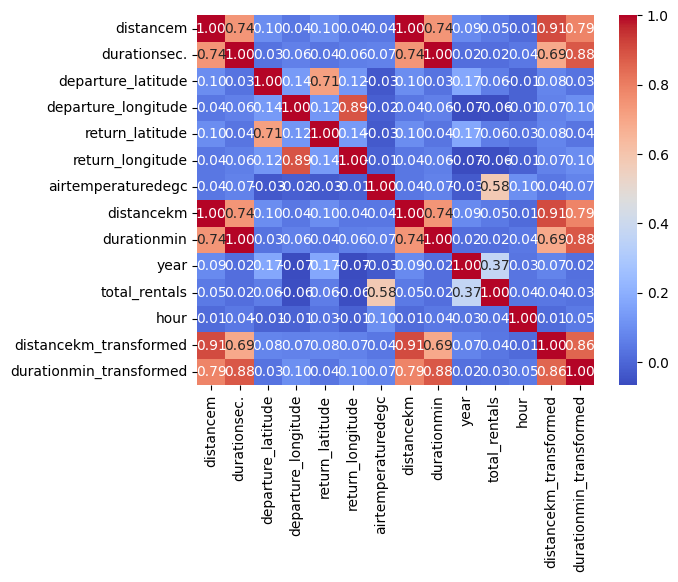

In [12]:
#correlation_df = data_sampled.drop(['departure','return'],axis=1)
#correlation_df.head()
corr = numerical.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()


In [13]:
corr_matrix = numerical.corr()
corr_scores = corr_matrix['total_rentals'].sort_values(ascending=False)

# showing only columns with correlation bigger than 0.5
#high_corr_cols = corr_scores[corr_scores > 0.4]

#for col_name, corr_score in high_corr_cols.items():
#    print(f"{col_name}: {corr_score}")

In [14]:
# x y split
y = data_sampled['total_rentals']
X = data_sampled[['airtemperaturedegc', 'hour', 'weekday', 'month', 'year']]

print(y.shape)
print(X.shape)

(1116575,)
(1116575, 5)


In [15]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# distinguish between numerical continuos, discrete and categorical variable so I can treat them later accordinghly
X_train_numerical_cont = X_train.select_dtypes(include=['float64'])
X_train_numerical_discrete = X_train.select_dtypes(include=['int64', 'object'])
#X_train_categorical = X_train.select_dtypes(include=['object'])

X_test_numerical_cont = X_test.select_dtypes(include=['float64'])
X_test_numerical_discrete = X_test.select_dtypes(include=['int64', 'object'])
#X_test_categorical = X_test.select_dtypes(include=['object'])

In [18]:
# encoding categorical features
encoder = OneHotEncoder(drop='first')
encoder.fit(X_train_numerical_discrete)

X_train_encoded = encoder.transform(X_train_numerical_discrete).toarray()
X_test_encoded = encoder.transform(X_test_numerical_discrete).toarray()

X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(), index=X_train_numerical_discrete.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(), index=X_test_numerical_discrete.index)

In [20]:
# savingh the one hot encoder
with open(config['encoder']['onehotencoder'], 'wb') as file:
    pickle.dump(encoder, file, HIGHEST_PROTOCOL)

In [22]:
# applying standard scaler
standard_scaler = StandardScaler()
standard_scaler.fit(X_train_numerical_cont)

X_train_numerical_scaled = standard_scaler.transform(X_train_numerical_cont)
X_train_numerical_scaled = pd.DataFrame(X_train_numerical_scaled, columns=X_train_numerical_cont.columns.tolist(), index=X_train_numerical_cont.index)

X_test_numerical_scaled = standard_scaler.transform(X_test_numerical_cont)
X_test_numerical_scaled = pd.DataFrame(X_test_numerical_scaled, columns=X_test_numerical_cont.columns.tolist(), index=X_test_numerical_cont.index)

In [23]:
# savingh the standard scaler
with open(config['scaler']['standard_scaler'], 'wb') as file:
    pickle.dump(standard_scaler, file, HIGHEST_PROTOCOL)

In [24]:
min_max = MinMaxScaler()
min_max.fit(X_train_numerical_scaled)

X_train_numerical_minmaxscaled = min_max.transform(X_train_numerical_scaled)
X_train_numerical_minmaxscaled = pd.DataFrame(X_train_numerical_scaled, columns=X_train_numerical_cont.columns.tolist(), index=X_train_numerical_cont.index)

X_test_numerical_minmaxscaled = min_max.transform(X_test_numerical_scaled)
X_test_numerical_minmaxscaled = pd.DataFrame(X_test_numerical_scaled, columns=X_test_numerical_cont.columns.tolist(), index=X_test_numerical_cont.index)

In [25]:
# savingh the min max scaler
with open(config['scaler']['min_max'], 'wb') as file:
    pickle.dump(min_max, file, HIGHEST_PROTOCOL)

In [27]:
#display(X_train_encoded.head())
#display(X_train_numerical_minmaxscaled.head())

In [28]:
# changing names of final dataframes to not mess up
X_train_concat = pd.concat([X_train_encoded, X_train_numerical_minmaxscaled], axis=1)
X_test_concat = pd.concat([X_test_encoded, X_test_numerical_minmaxscaled], axis=1)


In [30]:
# predicting total_rentals using a linearregression model
reg = LinearRegression()

reg.fit(X_train_concat, y_train)

y_pred = reg.predict(X_test_concat)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

print("Train data R2 was: {:.2f}".format(reg.score(X_train_concat, y_train)))
print("test data R2 was: {:.2f}".format(reg.score(X_test_concat, y_test)))

Mean squared error: 7251371.81
Coefficient of determination: 0.84
Train data R2 was: 0.84
test data R2 was: 0.84


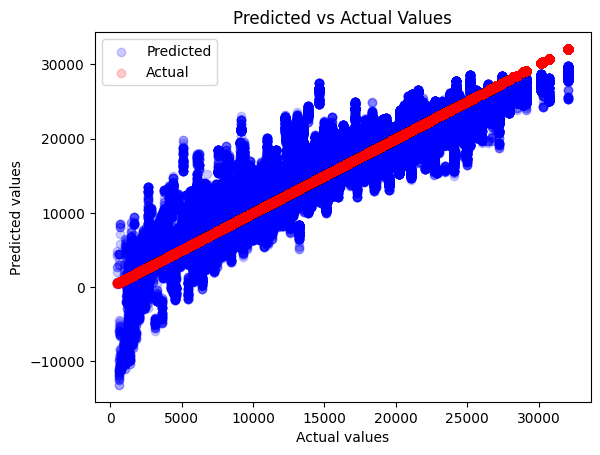

In [32]:
#lm visualization
plt.scatter(y_test, y_pred, alpha=0.2, color='blue', label='Predicted')
plt.scatter(y_test, y_test, alpha=0.2, color='red', label='Actual')

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual Values')

plt.legend()

plt.show()